<a href="https://colab.research.google.com/github/Tom-Jung/testttttt/blob/main/03_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%ED%8C%90%EB%8B%A4%EC%8A%A4_%EA%B8%B0%EC%B4%88_(%EC%88%98%EC%97%85%EC%A0%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 판다스 pandas 의 자료구조:  시리즈와 데이터프레임

판다스pandas 의 주요 기능
1. 데이터 불러오기 및 저장하기
    - 리스트, 딕셔너리를 data frame 으로 변환가능
    - csv, xlsx, tsv 파일 등을 읽고 저장할 수 있다.
2. 데이터 확인 및 계산
    - mean(), corr(), count()
3. 필터, 정렬 및 그룹화
    - 조건을 사용하여 열 필터링 가능 (엑셀필터처럼)
    - groupby()
    - .sort_values()
4. 데이터 정제
    - missing value 확인
    - 특정 값을 다른 값으로 대체 가능

- 이름의 유래 : panel data 에서 처음 사용됨

## 데이터프레임과 시리즈 DataFrame and Series
데이터프레임, 시리즈는 판다스에서 다루는 핵심 자료형이다.
- 1) 시리즈 Series (엑셀파일의 열 1개, 1차원 표데이터)
- 2) 데이터프레임 Dataframe (2차원 표데이터)
- 데이터가 들어가는 부분을 values, 행이름을 index(인덱스) 라고 부른다.

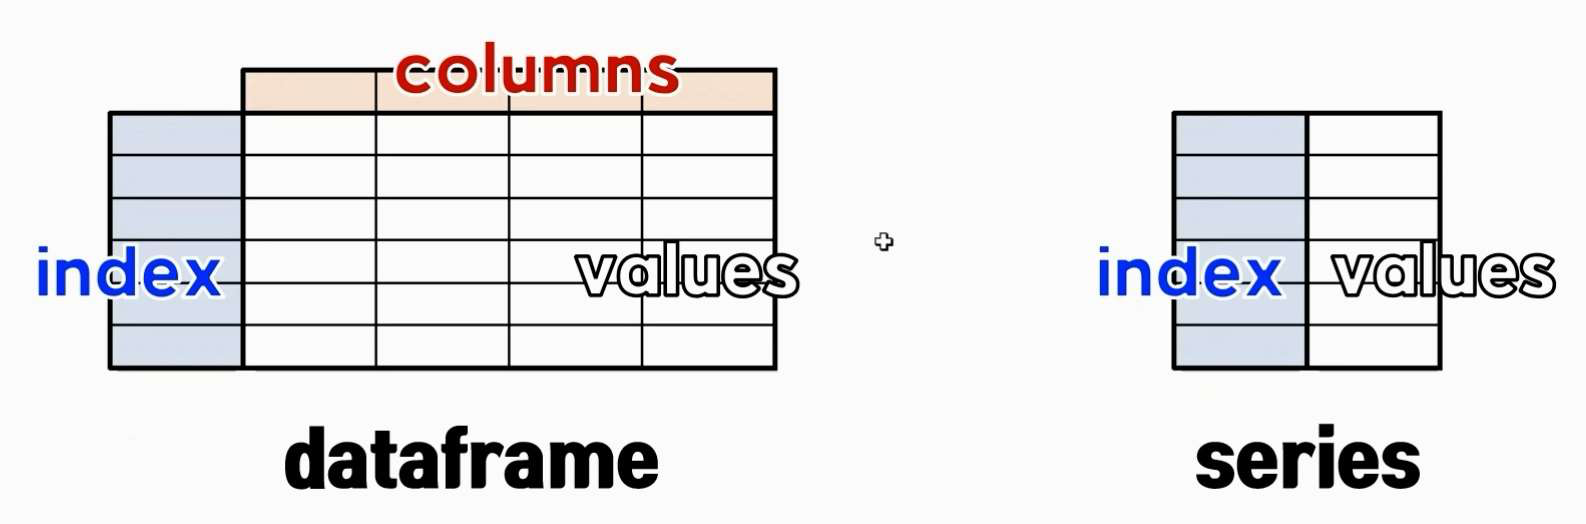

- 시리즈와 데이터프레임은 `판다스pandas` 패키지에서 지원하는 자료구조이므로, 사용하기 위해서는 판다스를 설치(install) 및 불러들이는(import) 과정이 필요하다.

- 단, 구글코랩에서는 판다스가 기본으로 설치되어 있으므로 import만으로 가능

In [1]:
# 불러들이기
#!pip install pandas
import pandas as pd

## **시리즈 Series**

- 판다스 공식문서 `pd.Series` [https://pandas.pydata.org/docs/reference/api/pandas.Series.html](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)

- Series 는 1차원 표 데이터 이다.
- 모든 데이터유형 (정수, 실수, 문자열 등) 저장 가능하다.
- Series의 2가지 속성:
    - 전체 이름(name)
    - 행의 이름(index)
- name, index 를 별도로 입력하지 않을 경우, `index`는 `0부터 시작하는 정수값`이 입력되고 `name`은 `빈값(None)`이 입력된다.


시리즈 만들기: 딕셔너리 활용
- 단, 딕셔너리의 경우 `중복된 key값을 허용하지 않기` 때문에 제한이 있다.

In [4]:
data = pd.Series({0:'홍길동', 1:'김한국', 2:'홍길동', 3:'김한국', 4:'장원영'})
data2 = pd.Series({'A0001':'홍길동', 'A0002':'김한국', 'A0001':'홍길동', 'A0002':'김한국', 'A0003':'장원영'},
                  name = '시리즈에 이름붙이기')
print(data, data2, sep = '\n\n\n\n\n')

0    홍길동
1    김한국
2    홍길동
3    김한국
4    장원영
dtype: object




A0001    홍길동
A0002    김한국
A0003    장원영
Name: 시리즈에 이름붙이기, dtype: object


시리즈 만들기: 리스트 활용

In [5]:
data = pd.Series(['홍길동', '김한국', '홍길동', '김한국', '장원영'])

In [6]:
data2 = pd.Series(['홍길동', '김한국', '홍길동', '김한국', '장원영'],
                 index = ['A0001', 'A0002', 'A0001', 'A0002', 'A0003'],
                  name = '시리즈에 이름붙이기')

In [7]:
print(data, data2, sep = '\n\n\n')

0    홍길동
1    김한국
2    홍길동
3    김한국
4    장원영
dtype: object


A0001    홍길동
A0002    김한국
A0001    홍길동
A0002    김한국
A0003    장원영
Name: 시리즈에 이름붙이기, dtype: object


- `info()`:  생성한 시리즈 정보 확인

In [ ]:
data.info()

**시리즈 확인 - 속성(attribute)**
- 시리즈의 index(행 이름)와 values(값) 속성으로 각 속성의 값을 출력할 수 있다.
- 소괄호가 붙지 않는다.

- 시리즈.index
- 시리즈.values


- 시리즈의 `iloc[]` 와 `loc[]`
- `iloc['행 번호']` 는 행의 인덱스값 (절대 위치) 을 가진다.
    - iloc (index location 의 약어)
- `loc['행 이름']` 는 행의 이름을 가진다.

In [ ]:
# data 시리즈의 iloc[] 와 loc[] 출력
data = pd.Series(['홍길동', '김한국', '홍길동', '김한국', '장원영'],
                 index = ['A0001', 'A0002', 'A0001', 'A0002', 'A0003'],
                  name = '시리즈에 이름붙이기')
data

In [ ]:
# index location 의 약어


In [ ]:
#행의 이름


In [ ]:
#행의 이름


- 음수 인덱스도 사용가능하다.

# 데이터프레임

아래와 같은 데이터프레임을 생성해보자.


<img src='https://drive.google.com/uc?export=download&id=1jW1MlpnpgyEwCuao_ijFm_Ws7EEHnZMe' width="" height ="" /><br>

In [8]:
v1 = [['홍길동', '영어', 100],
      ['김한국', '영어', 90],
      ['홍길동', '국어', 90],
      ['김한국', '국어', 100],
      ['장원영', '국어', 100]]
col = ['이름', '과목', '성적']
idx = ['A0001', 'A0002', 'A0001', 'A0002', 'A0003']
df = pd.DataFrame(data=v1, columns=col, index=idx)
df

,이름,과목,성적
A0001,홍길동,영어,100
A0002,김한국,영어,90
A0001,홍길동,국어,90
A0002,김한국,국어,100
A0003,장원영,국어,100


- 리스트로 데이터프레임 생성시 주의점: `행별 by row` 로 데이터 입력해야한다.

In [9]:
# 아래 코드는 오류 발생
v1 = [['홍길동', '김한국', '홍길동', '김한국', '장원영'],
      ['영어','영어','국어','국어','국어'],
      [100, 90, 90, 100, 100]]
col = ['이름', '과목', '성적']
idx = ['A0001', 'A0002', 'A0001', 'A0002', 'A0003']
df = pd.DataFrame(data=v1, columns=col, index=idx)
df

ValueError: 3 columns passed, passed data had 5 columns

In [ ]:
v1 = [['홍길동', '영어', 100],
      ['김한국', '영어', 90],
      ['홍길동', '국어', 90],
      ['김한국', '국어', 100],
      ['장원영', '국어', 100]]
col = ['이름', '과목', '성적']
idx = ['A0001', 'A0002', 'A0003', 'A0004', 'A0005']
df2 = pd.DataFrame(data=v1, columns=col, index=idx)
df2

### 시리즈 여러 개를 합쳐서 데이터프레임 생성

리스트로 데이터프레임 생성시 주의점:
- `행별 by row` 로 데이터를 입력해야 한다.
- `열별 by column` 로 데이터를 입력하고 싶을 경우에는, 각 열별로 리스트를 만든 후, 리스트를 시리즈로 변환하고, 시리즈들을 데이터프레임으로 묶는 방법이 가능하다.

In [10]:
import pandas as pd
# 오류발생
v1 = [['홍길동', '김한국', '홍길동', '김한국', '장원영'],
      ['영어','영어','국어','국어','국어'],
      [100, 90, 90, 100, 100]]
col = ['이름', '과목', '성적']
idx = ['A0001', 'A0002', 'A0001', 'A0002', 'A0003']
df = pd.DataFrame(data=v1, columns=col, index=idx)
df

ValueError: 3 columns passed, passed data had 5 columns

In [13]:
import pandas as pd
v1 = ['홍길동', '김한국', '홍길동', '김한국', '장원영']
v2 = ['영어','영어','국어','국어','국어']
v3 = [100, 90, 90, 100, 100]

s1 = pd.Series(v1)
s2 = pd.Series(v2)
s3 = pd.Series(v3)
print(s1, s2, s3, sep='\n')
print(type(s1))

0    홍길동
1    김한국
2    홍길동
3    김한국
4    장원영
dtype: object
0    영어
1    영어
2    국어
3    국어
4    국어
dtype: object
0    100
1     90
2     90
3    100
4    100
dtype: int64
<class 'pandas.core.series.Series'>


- `pd.DataFrame()` 사용

In [14]:
# 오류발생
pd.DataFrame(s1, s2, s3)

ValueError: Shape of passed values is (5, 1), indices imply (5, 5)

In [15]:
# 리스트 형태로 묶을 수 있음
pd.DataFrame([s1, s2, s3])

,0,1,2,3,4
0,홍길동,김한국,홍길동,김한국,장원영
1,영어,영어,국어,국어,국어
2,100,90,90,100,100


In [26]:
#파이썬 딕셔너리 활용
# key:value // 열이름:열의값
df = pd.DataFrame({'이름':s1, '과목':s2, '점수':s3})
df

,이름,과목,점수
0,홍길동,영어,100
1,김한국,영어,90
2,홍길동,국어,90
3,김한국,국어,100
4,장원영,국어,100


In [27]:
# transpose (행렬 전치)
df.T
# df.transpose()

,0,1,2,3,4
이름,홍길동,김한국,홍길동,김한국,장원영
과목,영어,영어,국어,국어,국어
점수,100,90,90,100,100


In [ ]:
# 열이름 변경


- `pd.concat()` 사용
    - 소괄호, 중괄호 사용 모두 가능
    - (s1, s2, s3)
    - [s1, s2, s3]

In [ ]:
pd.concat((s1, s2, s3), axis=1)
pd.concat([s1, s2, s3], axis=1)

- `Series.to_frame()` 함수 사용

- `to_frame()` 함수는 list 에 바로 적용은 불가능하다.
    - AttributeError: 'list' object has no attribute 'to_frame'


In [ ]:
v2 = ['영어','영어','국어','국어','국어']
s2 = pd.Series(v2)
s2

In [ ]:
s2.to_frame()
# pd.DataFrame(s2) 과 동일함

In [ ]:
# list 형에 바로 적용은 불가능
# AttributeError: 'list' object has no attribute 'to_frame'
v2 = ['영어','영어','국어','국어','국어']
#v2.to_frame()
pd.DataFrame(v2)

In [ ]:
s1

In [ ]:
s1.to_frame()

- 열이름 변경
- `df.rename()` : 딕셔너리의 **key:value** 구조 **변경 전:변경 후**
- `df.columns()`
- 이 밖에도 다양한 열이름 변경 방식이 가능하다.

In [ ]:
pd.concat((s1.rename('이름'), s2.rename('과목'), s3.rename('성적')), axis=1)

In [ ]:
df = pd.concat((s1, s2, s3), axis=1)
print('변경 전===\n',df)
df = df.rename(columns = {0:'이름', 1:'과목', 2:'성적'}) #딕셔너리 형태
print('\n\n변경 후===\n',df)

In [ ]:
df = pd.concat((s1, s2, s3), axis=1)
print(df, sep='\n')

df.columns = ['과목', '이름', '성적']
print(df)

- `info()`:  생성한 정보 확인

In [ ]:
v1 = [['홍길동', '영어', 100],
      ['김한국', '영어', 90],
      ['홍길동', '국어', 90],
      ['김한국', '국어', 100],
      ['장원영', '국어', 100]]
col = ['이름', '과목', '성적']
idx = ['A0001', 'A0002', 'A0001', 'A0002', 'A0003']
df = pd.DataFrame(data=v1, columns=col, index=idx)
df

In [ ]:
df.info()

- 행이름, 열이름, 값 확인

### 데이터프레임의 행 선택 & 다루기

- 행이름 읽기 loc[]
- 행번호 읽기 iloc[]
- 특정 행 범위 영역 선택 df[시작:마지막행]
- 특정 조건 선택 df.isin(values)

- **iloc:**
> - 하나의 행이 선택되면 Series를 반환하고 여러 행이 선택되면 DataFrame을 반환한다.
> - 여러 열 또는 여러 행 선택:
 - [1:5] 의 경우, 선택한 행/열은 `5 - 1` 총 4개 열/행이 선택된다.

- **loc:**
> - Labal / Index / Bool / Logical Indexing 기반 값을 전달하여 Series나 DataFrame의 값을 반환한다.

- **행과 열의 삭제:** "drop"기능 사용
> - drop 함수는 열이 제거 된 새 DataFrame을 반환하며 원래 DataFrame 값이 수정되려면 drop 함수 내 "inplace" 변수를 True로 설정
> - `axis=1`: 열을 의미한다.
> - `axis=0`: 행을 의미한다.
> - drop 함수는 숫자 인덱싱이 아닌 "Label" 기반으로 행을 제거하며 숫자위치나 Index를 기준으로 행을 삭제하려면 iloc을 사용해야 한다.


- 특정 값 출력

<img src='https://drive.google.com/uc?export=download&id=1xIY5vVOOExtXKOHGBg0aoF_M3GHDQdua' width="400" height ="" /><br>

In [ ]:
v1 = [['홍길동', '영어', 100],
      ['김한국', '영어', 90],
      ['홍길동', '국어', 90],
      ['김한국', '국어', 100],
      ['장원영', '국어', 100]]
col = ['이름', '과목', '성적']
idx = ['A0001', 'A0002', 'A0001', 'A0002', 'A0003']
df = pd.DataFrame(data=v1, columns=col, index=idx)
df

In [ ]:
# .iloc[ ] 사용 - 행인덱스 기반


In [ ]:
# .loc[ ] 사용 - 행이름 중복


In [ ]:
# .loc[ ] 사용 - 행이름 중복


- 행의 범위 인덱싱: .iloc[ ]를 사용하여 여러 행을 출력할 수 있다.

In [ ]:
# .iloc[ ] 사용 - 여러 행


- 행 제거
- axis=1 열// axis=0 행

In [ ]:
#drop


- 제거된 결과를 기존 dataframe 에 덮어씌우고 싶을 경우, `inplace=True` 옵션을 사용한다.
- `df.copy()` : 데이터프레임을 복사한다 (ctrl+c, ctrl+v 와 같은 기능)

### 데이터프레임의 열 선택 & 다루기

 <img src='https://drive.google.com/uc?export=download&id=1Dg4N9MJ8-CPntMNg6ckDZtUHTu6MgQHS' width="400" height ="" /><br>

In [ ]:
import pandas as pd
v1 = [['홍길동', '영어', 100],
      ['김한국', '영어', 90],
      ['홍길동', '국어', 90],
      ['김한국', '국어', 100],
      ['장원영', '국어', 100]]
col = ['이름', '과목', '성적']
idx = ['1', '2', '1', '2', '3']
df = pd.DataFrame(data=v1, columns=col, index=idx)

In [ ]:
df
# 1번
df['성적']

# 2번
df.성적

In [ ]:
df.성적.mean()

- 2개 이상의 열을 선택할 경우, 열들의 이름을 **리스트형식** 으로 입력한다.

- 여기에 인덱싱을 결합할 수 있다.

### 특정 행/열 제거
- `drop()` 함수 사용
    - axis=0: 행 제거
    - axis=1: 열 제거

In [ ]:
import pandas as pd
v1 = [['홍길동', '영어', 100],
      ['김한국', '영어', 90],
      ['홍길동', '국어', 90],
      ['김한국', '국어', 100],
      ['장원영', '국어', 100]]
col = ['이름', '과목', '성적']
idx = ['1', '2', '1', '2', '3']
df = pd.DataFrame(data=v1, columns=col, index=idx)
df

### 행, 열 인덱싱

 <img src='https://drive.google.com/uc?export=download&id=1zFqQ0P6qP2vfx104Q_COWASM3XzWuj8u' width="500" height ="" /><br>

- `.loc[ ]` 함수는 행을 인덱싱하면서 동시에 열 인덱싱도 가능하다.
- 단, 모두 '행의 이름', '열의 이름' 기반임에 유의해야한다.

```python
df.loc["행이름1":"행이름2", "열1":"열2"]
```

- `df.loc[: , :]` 전체 행, 전체 열을 출력
    - 특정 값을 설정하지 않으면 콜론 앞은 0, 콜론 뒤는 -1 으로 처리된다.


<img src='https://drive.google.com/uc?export=download&id=108N-XZ0WyjFb6PCufXRDY-1dPdRNJZ4c' width="600
" height ="" /><br>

<img src='https://drive.google.com/uc?export=download&id=1E115VjEtZaWIkiwrKQ5WtADAwz9NSWGu' width="500" height ="" /><br>

- `df.iloc[ ]` 함수도 행과 열 인덱싱이 가능하다.
- 이름이 아닌 **번호 기반** 임에 유의한다.
- `df.iloc[:,:]`: 전체 행, 열 출력
    - 특정 값을 설정하지 않으면 콜론 앞은 0, 콜론 뒤는 -1 으로 처리된다.

In [ ]:
import pandas as pd
v1 = [['홍길동', '영어', 100],
      ['김한국', '영어', 90],
      ['홍길동', '국어', 90],
      ['김한국', '국어', 100],
      ['장원영', '국어', 100]]
col = ['이름', '과목', '성적']
idx = ['1', '2', '1', '2', '3']
df = pd.DataFrame(data=v1, columns=col, index=idx)
df

In [ ]:
# 쉼표만 넣으면 오류 발생 - SyntaxError: invalid syntax
df.loc[ , ]

In [ ]:
# 아래에서 콜론이 없으면 오류발생
df.loc[:, "이름"]

In [ ]:
# loc의 경우 중복된 행이름이 있는 경우 오류발생
# KeyError: "Cannot get left slice bound for non-unique label: '1'"
df.loc['1':'3', "이름"]

In [ ]:
# 음수 인덱싱도 가능하다
df.iloc[-3:, :]

---
# 데이터프레임 심화

### 기초통계량 및 고유값 확인

- describe(): 데이터 요약
- info(): 데이터 요약(자료형, 결측치 등)
- df.shape: 데이터의 행과 열의 크기
- df.dtypes: 열별 자료형

- count():	각 열의 개수 (결측치가 아닌 값)
- value_counts(): 각 열의 고유값 개수
    - unique(): 시리즈- 특정 열의 고유값

- mode():	최빈값

- sum(): 값의 합계
- mean(): 평균 값
- median(): 중간 값
- std(): 표준편차
- var(): 분산
- min(): 최소값
- max(): 최대값
- abs():	절대값
- prod():	값의 곱셈값 표현
- cumsum():	Row기반으로 누적합 표현
- cumprod(): Row기반으로 누적곱셈 표현
- cov(): 공분산
- corr(): 상관계수



In [ ]:
import pandas as pd
v1 = [['홍길동', '영어', 70],
      ['김한국', '영어', 90],
      ['장원영', '국어', 95],
      ['안유진', '국어', 90],
      ['김수현', '국어', 80]]
col = ['이름', '과목', '성적']
idx = ['A0001', 'A0002', 'A0003', 'A0004', 'A0005']
df = pd.DataFrame(data=v1, columns=col, index=idx)
df

In [ ]:
df

- `isin()`: 특정 값을 포함하는 값 출력

In [ ]:
df['과목'].isin(['국어']) #boolean 불리언 자료형으로 출력

- `value_counts()` : 고유한 값의 개수

In [ ]:
df.value_counts()

- `unique()`: 특정 열 (Series 자료구조) 에 적용가능하다. 데이터프레임 전체에 대해서는 적용 불가능

In [ ]:
#데이터프레임 전체에 대해서는 적용 불가능
df.unique()

아래 함수들은 float, int 자료형에 대해서만 적용된다.
- sum():	값의 합계
- mean():	값의 평균 값
- std():	 표준편차
- min():	최소값


최빈값의 경우, object 자료형에도 적용 된다.
- mode():	최빈값

In [ ]:
df.mode()

- 숫자형이 아닌 열에 대해서 수치계산(평균 등) 을 적용할 경우 오류가 발생한다.

### 조건을 이용한 값의 추출 (필터링)

- Boolean 인덱싱 하기
- '성적' 열에서 80보다 큰 값 인덱싱

- '성적' 열에서 80보다 큰 값만 출력 (True, False 말고 해당되는 행들만)

- 성적이 70 이상, 90 미만인 값만 출력

[ 퀴즈 ]
- '성적'이 90 보다 높은 사람의 이름만 출력

### 값 변경 / 대치 (replace)

- 조건에 맞는 값을 특정 값으로 대체할 수 있다.

In [ ]:
df2 = df.copy()
df[ (df.성적 >= 90) & (df.성적 < 95) ] = '구십점'
df

In [ ]:
df2.loc[ (df2.성적 >= 90) & (df2.성적 < 95), '성적'] = '구십점'
df2

### 값의 정렬
- `.sort_values('열이름')`

In [ ]:
import pandas as pd
v1 = [['홍길동', '영어', 70],
      ['김한국', '영어', 90],
      ['장원영', '국어', 95],
      ['안유진', '국어', 90],
      ['김수현', '국어', 80]]
col = ['이름', '과목', '성적']
idx = ['A0001', 'A0002', 'A0003', 'A0004', 'A0005']
df = pd.DataFrame(data=v1, columns=col, index=idx)
df

In [ ]:
# 옵션 기본값 오름차순 ascending=True


### 결측값 확인 및 대치

In [ ]:
import pandas as pd
v1 = [['홍길동', '영어', 10, 80, 5, 10],
      ['김한국', '영어', 20, None, 10, None],
      ['장원영', '국어', 30, 100, 5, None],
      ['안유진', '국어', 40, None, None, 5],
      ['김수현', '국어', 50, 60, None, 0]]
col = ['이름', '과목', 'mid', 'final', 'quiz01', 'quiz02']
idx = ['A0001', 'A0002', 'A0003', 'A0004', 'A0005']
df = pd.DataFrame(data=v1, columns=col, index=idx)
df

- `df.isna(), df.isnull()`: 결측치 여부로 Boolean 생성

- `dropna()` :
    - 기본값: 결측치 발생한 행 전체 제거
    - axis=0: 행 제거
    - axis=1: 열 제거

- `fillna()`: 결측치 대체

- 기초통계량을 활용하여 각 열별로 결측치를 다른 방식으로 대체

In [ ]:
import pandas as pd
v1 = [['홍길동', '영어', 10, 80, 5, 10],
      ['김한국', '영어', 20, None, 10, None],
      ['장원영', '국어', 30, 100, 5, None],
      ['안유진', '국어', 40, None, None, 5],
      ['김수현', '국어', 50, 60, None, 0]]
col = ['이름', '과목', 'mid', 'final', 'quiz01', 'quiz02']
idx = ['A0001', 'A0002', 'A0003', 'A0004', 'A0005']
df = pd.DataFrame(data=v1, columns=col, index=idx)
df

In [ ]:
# final = 평균, quiz01 = 0점, quiz02 = 최소값


---
# 실습문제

In [ ]:
import pandas as pd
#state = 미국 주
#year = 연도
#pop = 인구

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'LA', 'LA'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 5.5, 6.0]}

dt = pd.DataFrame(data)
dt

1. 모든 열 (변수)의  기술통계치를 한 번에 볼 수 있게 출력해보세요.(힌트: describe())

2. 각 열의 자료형을 확인하는 함수를 사용하여 결과를 출력해보세요.

3. 'state' 열만 따로 출력해보세요.

4. 인덱싱을 사용하여 'state' 열에서 'LA' 값에 해당하는 행들만 따로 출력해보세요.

5. 함수를 사용하여 'state'열에 있는 요소를 중복 없이 출력해보세요.

6. 전체 인구(pop)평균값을 출력해보세요.

7. 전체 인구(pop)의 최대값을 출력해보세요.

8. 전체 인구(pop)의 최소값을 출력해보세요.

9. 'state'가 'Ohio'인지 여부를 나타내는 Bool 배열을 출력해보세요. (출력값이 True, False 중 하나로 나오게끔)

10. 'Ohio'에 해당하는 행만 선택한 후 출력해보세요. (Bool배열 T/F 말고 실제 값들이 출력되게끔 )

11. Ohio의 자료만 담고있는 DataFrame을 새로 만들어서 출력해보세요. (새로운 dataframe 이름 : dt2 )

12. 11번에서 만든 dt2 에 대해서 인구가 2보다 많은 행만 선택한 후 출력해보세요. (Bool배열 T/F 말고 실제 값들이 출력되게끔 )

13. "Ohio" 에 있는 인구의 평균만 계산해보세요.

14. Ohio의 2002년도 인구를 인덱싱을 이용하여 4.9로 바꿔보세요 (원래 값은 3.6)

---
😊 수고하셨습니다 😊